# Stream B: GBM & Healthy

In [1]:
import pandas as pd
import numpy as np
import pycombat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Import preprocessed files

In [2]:
metadata_filepath = "data/processed/metadata_gbm_healthy.csv"
expression_filepath = "data/processed/expression_gbm_healthy.csv"

In [3]:
gene_expression_df = pd.read_csv(expression_filepath, index_col='sample_id')


In [ ]:
gene_expression_df

,ENSG00000242268,ENSG00000259041,ENSG00000270112,ENSG00000167578,ENSG00000278814,ENSG00000078237,ENSG00000269416,ENSG00000263642,ENSG00000146083,ENSG00000158486,...,ENSG00000009694,ENSG00000238244,ENSG00000216352,ENSG00000123685,ENSG00000267117,ENSG00000273233,ENSG00000105063,ENSG00000231119,ENSG00000280861,ENSG00000181518
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-19-1787-01,-9.9658,-9.9658,-3.8160,5.2998,-9.9658,3.5086,0.8647,-9.9658,4.2465,-5.0116,...,-1.4305,-9.9658,-9.9658,1.2271,-3.3076,-1.2481,5.2661,-0.2159,-9.9658,-9.9658
GTEX-13QIC-0011-R1a-SM-5O9CJ,-9.9658,-9.9658,-1.8314,6.4989,-9.9658,1.1577,-1.9942,-9.9658,4.0331,-3.6259,...,-1.6394,-9.9658,-9.9658,1.4962,-0.9132,-1.8314,4.8182,-1.3921,-9.9658,-9.9658
TCGA-06-5412-01,-4.2934,-9.9658,0.1519,6.1687,-9.9658,4.3148,-2.0529,-9.9658,3.9022,-9.9658,...,0.9268,-9.9658,-9.9658,4.6753,-9.9658,-3.1714,5.0193,1.5998,-9.9658,-9.9658
GTEX-N7MS-2526-SM-26GMA,-0.5756,-9.9658,3.7204,6.0086,-9.9658,1.0711,-0.5973,-9.9658,5.2936,-3.1714,...,4.1351,-9.9658,-9.9658,-0.3201,-9.9658,-9.9658,4.9141,-0.7346,-9.9658,-9.9658
GTEX-N7MS-2526-SM-26GMR,-2.8262,-9.9658,1.7489,2.1894,-9.9658,1.0573,-2.9324,-9.9658,2.0912,-4.2934,...,4.0584,-9.9658,-9.9658,-3.3076,-9.9658,-9.9658,2.0912,-0.4921,-9.9658,-9.9658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-13G51-0011-R6b-SM-5LZX4,-1.0262,-9.9658,-0.8599,5.6789,-9.9658,1.4652,-0.3383,-9.9658,4.0375,-3.0469,...,1.0503,-9.9658,-9.9658,3.8501,-2.4659,-0.7834,4.9723,-1.5951,-9.9658,-9.9658
GTEX-YFC4-0011-R10a-SM-4SOK5,-0.6416,-9.9658,1.2576,6.5322,-9.9658,2.7379,-3.6259,-9.9658,5.2483,-9.9658,...,1.1050,-9.9658,-9.9658,2.7161,-9.9658,1.1770,5.7576,-2.1140,-9.9658,-9.9658
GTEX-13112-0011-R4b-SM-5DUXL,-2.5479,-9.9658,-1.0862,5.5100,-9.9658,0.7579,-2.3884,-9.9658,3.6089,-4.6082,...,-0.5973,-9.9658,-9.9658,1.6093,-9.9658,-1.0559,4.5528,-2.5479,-9.9658,-9.9658


In [7]:
metadata_df = pd.read_csv(
    metadata_filepath, 
    index_col='sample_id'
)
metadata_df

,label
sample_id,
GTEX-13SLW-0011-R4b-SM-5S2W2,1
GTEX-13RTJ-0011-R4b-SM-5PNX1,1
GTEX-WVLH-0011-R4A-SM-3MJFS,1
GTEX-147GR-0011-R4a-SM-5S2V2,1
GTEX-13N2G-0011-R4b-SM-5MR54,1
...,...
TCGA-12-0616-01,3
TCGA-12-3653-01,3
TCGA-06-2569-01,3


In [8]:
X = gene_expression_df
y = metadata_df

print(f"Loaded X (features) with shape: {X.shape}")
print(f"Loaded y (labels) with shape: {y.shape}")

# --- 2. Run PCA ---
# We already scaled the data, so we can run PCA directly
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)

# Get the variance explained by each component
variance_explained = pca.explained_variance_ratio_
pc1_var = variance_explained[0] * 100
pc2_var = variance_explained[1] * 100

print("PCA complete.")

# --- 3. Create PCA Results DataFrame ---
# Put the PCA results into a DataFrame
pca_df = pd.DataFrame(
    data_pca,
    columns=['PC1', 'PC2'],
    index=X.index # Use the sample IDs from X as the index
)

# --- 4. Add Metadata for Plotting ---
# Add the 1, 2, 3 labels from our 'y' file
pca_df['label_id'] = y['label']

# Create a meaningful text label for plotting
text_label_map = {1: 'Healthy', 3: 'GBM'}
pca_df['Diagnosis'] = pca_df['label_id'].map(text_label_map)

# Infer the batch from the sample_id (TCGA or GTEX)
pca_df['Batch (Study)'] = ['TCGA' if 'TCGA' in idx else 'GTEX' for idx in pca_df.index]

print("PCA results merged with labels. Ready to plot.")
display(pca_df.head())

Loaded X (features) with shape: (1304, 60498)
Loaded y (labels) with shape: (1304, 1)
PCA complete.
PCA results merged with labels. Ready to plot.


,PC1,PC2,label_id,Diagnosis,Batch (Study)
sample_id,,,,,
TCGA-19-1787-01,66.856825,-98.128737,3,GBM,TCGA
GTEX-13QIC-0011-R1a-SM-5O9CJ,6.241593,-23.047287,1,Healthy,GTEX
TCGA-06-5412-01,40.745859,-128.302150,3,GBM,TCGA
GTEX-N7MS-2526-SM-26GMA,68.776130,127.318326,1,Healthy,GTEX
GTEX-N7MS-2526-SM-26GMR,-84.021132,142.474855,1,Healthy,GTEX


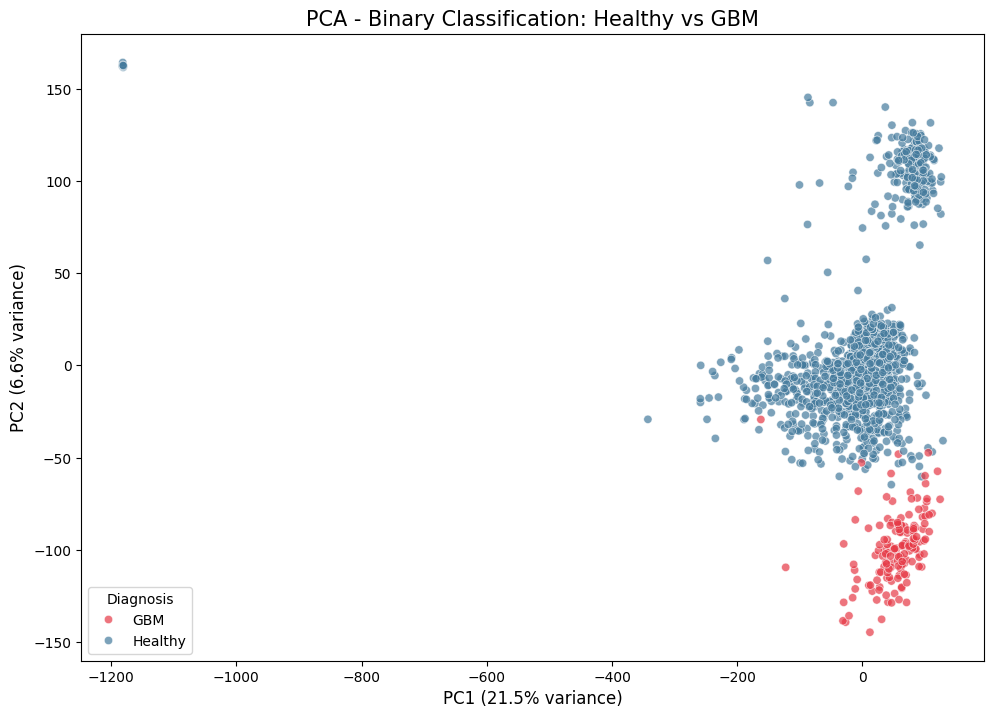

In [10]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Diagnosis',
    palette={'Healthy': '#457B9D', 'GBM': '#E63946'},
    alpha=0.7,

)
plt.tight_layout()
plt.title('PCA - Binary Classification: Healthy vs GBM', fontsize=15),
plt.xlabel(f'PC1 ({pc1_var:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pc2_var:.1f}% variance)', fontsize=12)
plt.show()


### Top 30 most impactful genes

Loaded X ((1304, 60498)) and y ((1304,))
Removed 8465 constant or low-variance genes.
Running test on remaining 52033 active genes.
ANOVA F-test complete.

--- Top 30 Most Impactful Genes (Corrected) ---


,gene_id,f_score,p_value
4222,ENSG00000222627,26.163007,3.607481e-07
38439,ENSG00000252942,25.128589,6.102374e-07
21644,ENSG00000253619,22.020808,2.981714e-06
49889,ENSG00000207098,21.356139,4.192494e-06
33624,ENSG00000020219,21.198297,4.546287e-06
20134,ENSG00000234466,19.860958,9.043837e-06
36566,ENSG00000234984,19.853705,9.077697e-06
9264,ENSG00000281408,18.893328,1.489947e-05
15385,ENSG00000235215,18.473758,1.850883e-05
37631,ENSG00000250716,18.316964,2.007316e-05


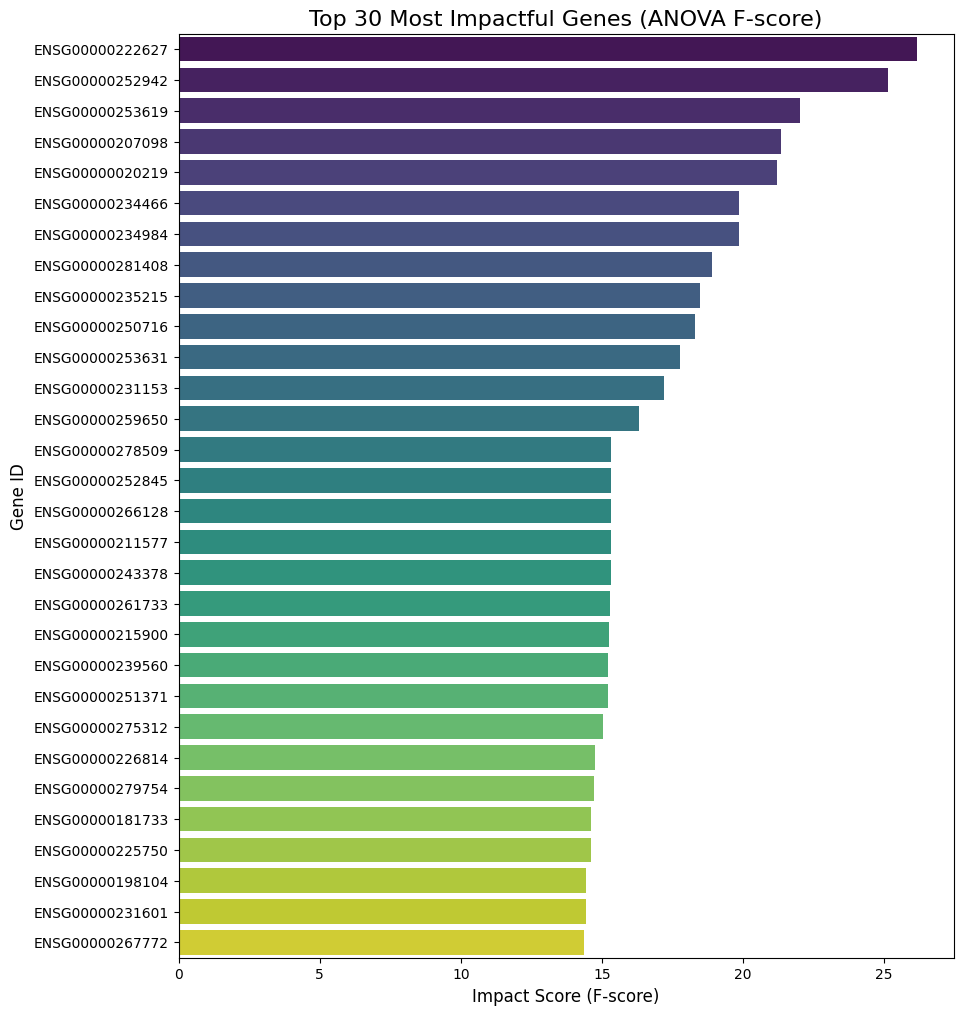

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

# We need y as a 1D array for the test
y_ravel = y.values.ravel()

# This assumes X and y_ravel are loaded from your EDA notebook setup
print(f"Loaded X ({X.shape}) and y ({y_ravel.shape})")

# --- 1. NEW: Filter X to remove constant/dead genes ---
# Calculate variance for each gene (column) in our scaled data
gene_variances = X.var(axis=0)

# We will only keep genes with a variance > 0.01
# This is a safe threshold to remove "dead" genes (which have 0 variance)
# and "noisy" genes (which have near-0 variance)
variance_filter = gene_variances > 0.01 

# Apply the filter to X
X_active_genes = X.loc[:, variance_filter] # .loc to be explicit

genes_removed = X.shape[1] - X_active_genes.shape[1]
print(f"Removed {genes_removed} constant or low-variance genes.")
print(f"Running test on remaining {X_active_genes.shape[1]} active genes.")

# --- 2. Run ANOVA F-test *on the filtered data* ---
f_scores, p_values = f_classif(X_active_genes, y_ravel)
print("ANOVA F-test complete.")

# --- 3. Create a DataFrame of Results ---
gene_impact_df = pd.DataFrame({
    'gene_id': X_active_genes.columns, # Use columns from the filtered data
    'f_score': f_scores,
    'p_value': p_values
})

# We can now safely drop any remaining NaNs (though there shouldn't be)
gene_impact_df = gene_impact_df.dropna()

# --- 4. Get the Top 30 *True* Genes ---
# Sort by the F-score (highest first)
top_30_genes = gene_impact_df.sort_values(by='f_score', ascending=False).head(30)

print("\n--- Top 30 Most Impactful Genes (Corrected) ---")
display(top_30_genes)

# --- 5. Plot the Top 30 Gene Scores ---
plt.figure(figsize=(10, 12))
sns.barplot(
    x='f_score',
    y='gene_id',
    data=top_30_genes,
    palette='viridis',
    hue='gene_id',    # <-- FIX: Assign y variable to hue
    legend=False
)
plt.title('Top 30 Most Impactful Genes (ANOVA F-score)', fontsize=16)
plt.xlabel('Impact Score (F-score)', fontsize=12)
plt.ylabel('Gene ID', fontsize=12)
plt.show()

Generating clustermap for 200 genes and 60 samples...


/Users/musab/Developer/school/ai-brain-tumor/.venv/lib/python3.14/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/musab/Developer/school/ai-brain-tumor/.venv/lib/python3.14/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


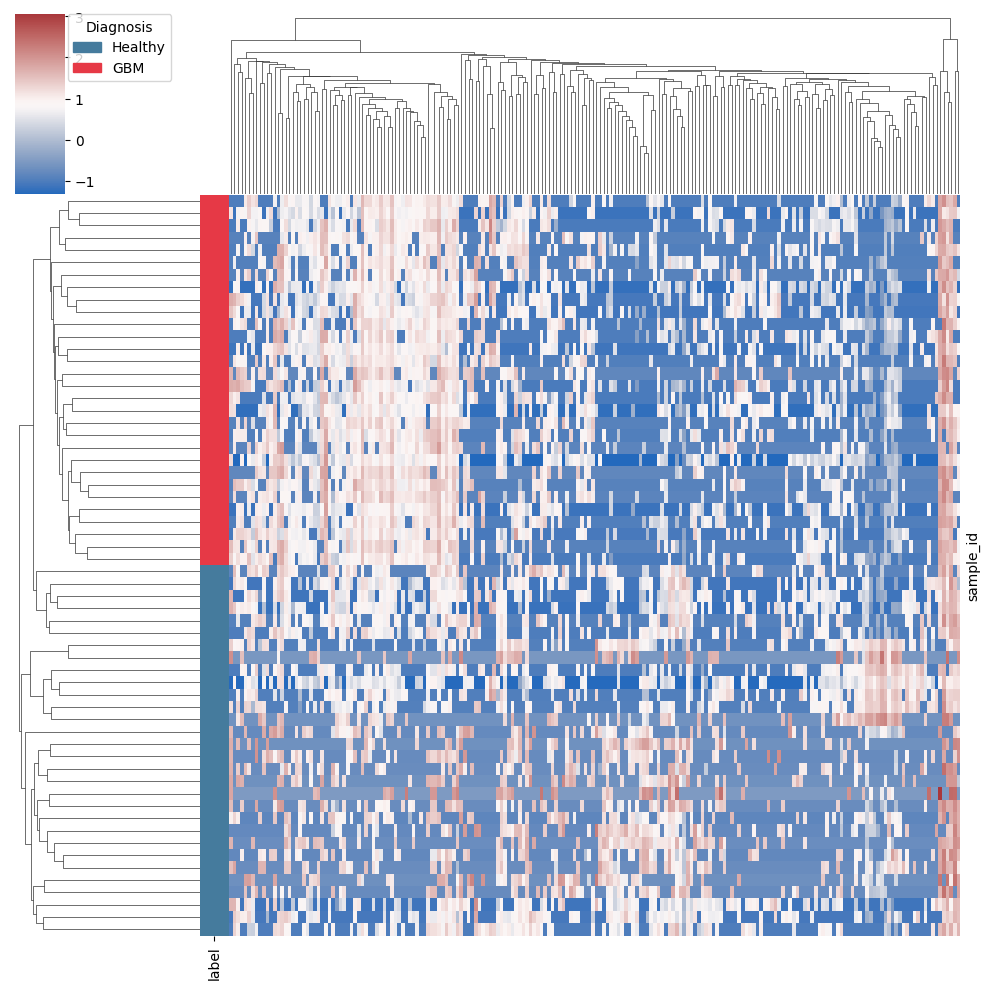

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. Define Parameters ---
n_top_genes = 200       # How many genes to plot
n_samples_per_class = 30 # How many samples from each class

# --- 2. Find Top Variable Genes ---
# X is (samples x genes), so we calculate variance for each column (gene)
gene_variances = X.var(axis=0) 
top_genes = gene_variances.nlargest(n_top_genes).index
X_top_genes = X[top_genes]

# --- 3. Create a Stratified Sample ---
# We need to get a random, equal-sized group from each class
# First, join X and y
data_for_sampling = X_top_genes.join(y)

# Use groupby().sample() to get n_samples_per_class from each label
sampled_df = data_for_sampling.groupby('label').sample(
    n=n_samples_per_class, 
    random_state=42
)

# Separate the data (X) and labels (y) again
sampled_data = sampled_df.drop('label', axis=1)
sampled_labels = sampled_df['label']

# --- 4. Create Color Mapping for Labels ---
# We create a color bar to show which sample is which
# Your mapping: 1=Healthy, 3=GBM
palette = {1: '#457B9D', 3: '#E63946'}
row_colors = sampled_labels.map(palette)

# --- 5. Create the Clustermap ---
print(f"Generating clustermap for {n_top_genes} genes and {len(sampled_data)} samples...")

g = sns.clustermap(
    sampled_data, 
    z_score=0,       # Scale by row (gene) to see relative expression
    cmap='vlag',     # A good diverging colormap (blue-white-red)
    row_colors=row_colors, # Adds the color bar for our 3 classes
    xticklabels=False, # Hide gene names (too many)
    yticklabels=False, # Hide sample names (too many)
    figsize=(10, 10)
)

# Add a legend
handles = [plt.Rectangle((0,0),1,1, color=palette[l]) for l in [1, 3]]
plt.legend(handles, ['Healthy', 'GBM'], 
           title='Diagnosis', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

#### Plot top gene

Plotting expression for top gene: ENSG00000222627


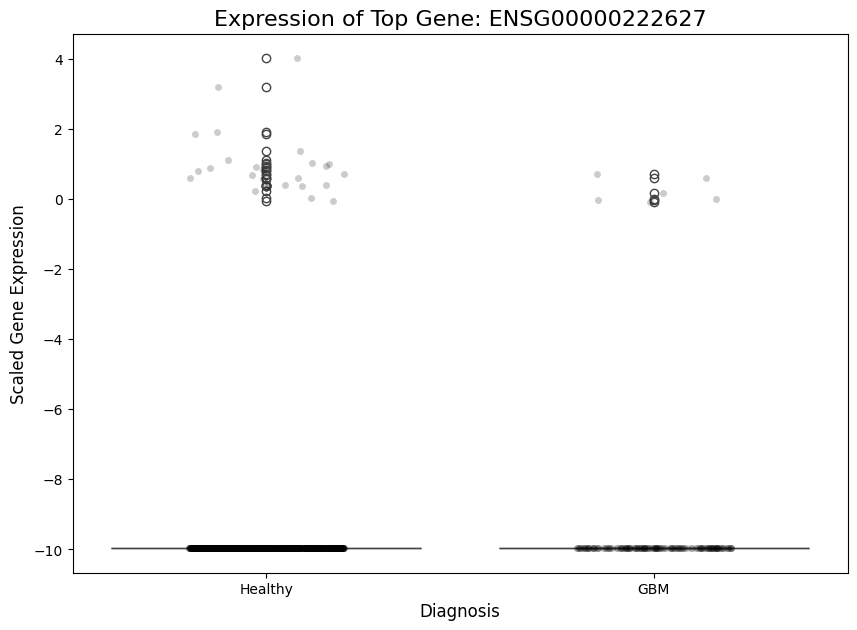

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Get the #1 Gene ID ---
top_gene_id = top_30_genes.iloc[0]['gene_id']

print(f"Plotting expression for top gene: {top_gene_id}")

# --- 2. Create a DataFrame for Plotting ---
plot_df = pd.DataFrame(X[top_gene_id])
plot_df['label'] = y['label']
text_label_map = {1: 'Healthy', 3: 'GBM'}
plot_df['Diagnosis'] = plot_df['label'].map(text_label_map)

# --- 3. Create the Boxplot (FIXED) ---
plt.figure(figsize=(10, 7))

sns.boxplot(
    data=plot_df,
    x='Diagnosis',
    y=top_gene_id,
    palette={'Healthy': '#457B9D', 'GBM': '#E63946'},
    order=['Healthy', 'GBM'], # Ensure correct order
    hue='Diagnosis',  # <-- FIX: Assign x variable to hue
    legend=False      # <-- FIX: Set legend to False
)

sns.stripplot(
    data=plot_df,
    x='Diagnosis',
    y=top_gene_id,
    color='black',
    alpha=0.2, # Make points transparent
    jitter=0.2, # Spread points out
    order=['Healthy', 'GBM']
)

plt.title(f'Expression of Top Gene: {top_gene_id}', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Scaled Gene Expression', fontsize=12)
plt.show()

## Data Driven feature selection

### LASSO

Split data into 1043 training and 261 test samples.
Running Data-Driven Selection (Lasso)...
Lasso (C=0.1) selected 460 genes.

--- Top Genes Selected by Lasso ---
['ENSG00000262662', 'ENSG00000251301', 'ENSG00000228360', 'ENSG00000254418', 'ENSG00000265802', 'ENSG00000234740', 'ENSG00000222990', 'ENSG00000271550', 'ENSG00000259364', 'ENSG00000270482', 'ENSG00000207765', 'ENSG00000250753', 'ENSG00000199785', 'ENSG00000276412', 'ENSG00000231943', 'ENSG00000270792', 'ENSG00000272627', 'ENSG00000238165', 'ENSG00000274051', 'ENSG00000233087']

Plotting expression for top Lasso gene: ENSG00000262662


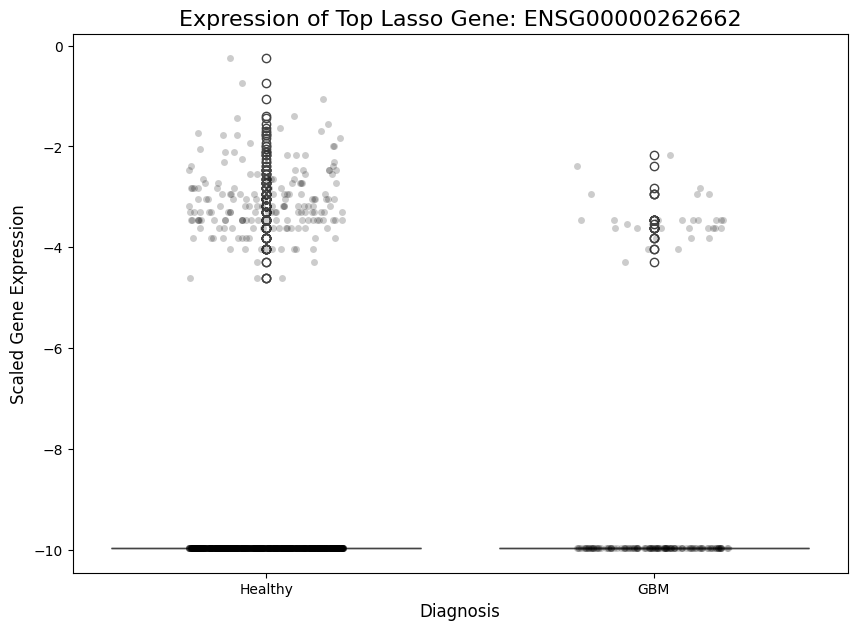

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier  # <-- 1. Import the wrapper
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
y_train_ravel = y_train.values.ravel()
print(f"Split data into {len(X_train)} training and {len(X_test)} test samples.")

# --- 2. Run Lasso (L1) Feature Selection (FIXED) ---
print("Running Data-Driven Selection (Lasso)...")

# 1. Create the *base* Lasso estimator (for a binary problem)
# Note: 'multi_class' is removed
base_lasso_estimator = LogisticRegression(
    penalty='l1',
    solver='liblinear',  # 'liblinear' is perfect for binary l1
    class_weight='balanced',
    C=0.1,  # You can tune this
    random_state=42
)

# 2. Create the multiclass wrapper (This is the fix)
# This wrapper will train one classifier for each class (e.g., Healthy vs. Rest)
ovr_classifier = OneVsRestClassifier(base_lasso_estimator)

# 3. Fit the wrapped classifier on the TRAINING data
ovr_classifier.fit(X_train, y_train_ravel)

# 4. Manually get the selected features (replaces SelectFromModel)
# We check the coefficients from *all 3* classifiers (one for each class)
# .estimators_ holds the list of [clf_for_class_1, clf_for_class_2, clf_for_class_3]
all_coefs = np.vstack([est.coef_ for est in ovr_classifier.estimators_])

# A gene is "selected" if its coefficient is non-zero in *any* of the 3 models
# We sum the absolute values of coefficients across all classes
# (We use 1e-5 as a "non-zero" threshold to handle floating point noise)
features_selected_mask = np.sum(np.abs(all_coefs), axis=0) > 1e-5

# 5. Get the final gene list
feature_list_A = X_train.columns[features_selected_mask]

print(f"Lasso (C=0.1) selected {len(feature_list_A)} genes.")
print("\n--- Top Genes Selected by Lasso ---")
print(list(feature_list_A[:20])) # Print first 20

# --- 5. Plot a Boxplot for the FIRST gene from THIS list ---
if len(feature_list_A) > 0:
    top_gene_id_lasso = feature_list_A[0]
    print(f"\nPlotting expression for top Lasso gene: {top_gene_id_lasso}")

    # Create a DataFrame for Plotting (using the full X and y)
    plot_df = pd.DataFrame(X[top_gene_id_lasso])
    plot_df['label'] = y['label']
    text_label_map = {1: 'Healthy', 3: 'GBM'}
    plot_df['Diagnosis'] = plot_df['label'].map(text_label_map)

    # Create the Boxplot
    plt.figure(figsize=(10, 7))
    sns.boxplot(
        data=plot_df,
        x='Diagnosis',
        y=top_gene_id_lasso,
        palette={'Healthy': '#457B9D', 'GBM': '#E63946'},
        order=['Healthy', 'GBM'],
        hue='Diagnosis',
        legend=False
    )
    sns.stripplot(
        data=plot_df,
        x='Diagnosis',
        y=top_gene_id_lasso,
        color='black',
        alpha=0.2,
        jitter=0.2,
        order=['Healthy', 'GBM']
    )
    plt.title(f'Expression of Top Lasso Gene: {top_gene_id_lasso}', fontsize=16)
    plt.xlabel('Diagnosis', fontsize=12)
    plt.ylabel('Scaled Gene Expression', fontsize=12)
    plt.show()

else:
    print("Lasso selected 0 genes. Your C value (0.1) might be too strong.")
    print("Try increasing C (e.g., C=0.5 or C=1.0) to select more features.")

### RFE


Running Data-Driven Selection (RFE)...
Fitting RFE... (This may take a moment)
RFE selected 250 genes.

--- First 20 Genes Selected by RFE ---
['ENSG00000189099', 'ENSG00000196126', 'ENSG00000254418', 'ENSG00000234740', 'ENSG00000221852', 'ENSG00000271550', 'ENSG00000199785', 'ENSG00000167916', 'ENSG00000231943', 'ENSG00000270792', 'ENSG00000238165', 'ENSG00000211666', 'ENSG00000266743', 'ENSG00000219814', 'ENSG00000276188', 'ENSG00000241975', 'ENSG00000272810', 'ENSG00000124334', 'ENSG00000277027', 'ENSG00000241020']

Plotting expression for top RFE gene: ENSG00000189099


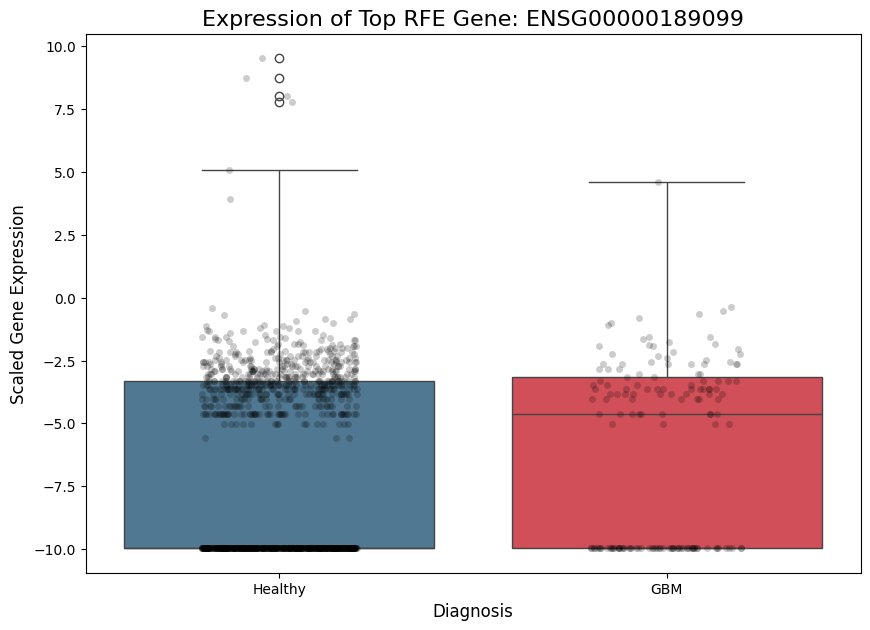

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

print("\nRunning Data-Driven Selection (RFE)...")

# --- 1. Create the base estimator model (FIXED) ---
# We switch to the 'lbfgs' solver, which natively supports
# multi-class classification and removes the warnings.
rfe_estimator = LogisticRegression(
    solver='lbfgs',      # <-- This is the fix
    class_weight='balanced',
    # 'multi_class' is not needed; 'lbfgs' handles it automatically
    random_state=42
)

# --- 2. Create the RFE selector ---
selector_rfe = RFE(
    estimator=rfe_estimator,
    n_features_to_select=250, # You can change this number
    step=0.1 # Removes 10% of features at each step (faster)
)

# --- 3. Fit the selector on the TRAINING data ---
print("Fitting RFE... (This may take a moment)")
selector_rfe.fit(X_train, y_train_ravel)

# --- 4. Get the results ---
features_selected_mask_rfe = selector_rfe.get_support()
feature_list_B = X_train.columns[features_selected_mask_rfe]

print(f"RFE selected {len(feature_list_B)} genes.")
print("\n--- First 20 Genes Selected by RFE ---")
print(list(feature_list_B[:20]))

# --- 5. Plot a Boxplot for the FIRST gene from THIS list ---
if len(feature_list_B) > 0:
    top_gene_id_rfe = feature_list_B[0]
    print(f"\nPlotting expression for top RFE gene: {top_gene_id_rfe}")

    # Create a DataFrame for Plotting (using the full X and y)
    plot_df = pd.DataFrame(X[top_gene_id_rfe])
    plot_df['label'] = y['label']
    text_label_map = {1: 'Healthy', 3: 'GBM'}
    plot_df['Diagnosis'] = plot_df['label'].map(text_label_map)

    # Create the Boxplot
    plt.figure(figsize=(10, 7))
    sns.boxplot(
        data=plot_df,
        x='Diagnosis',
        y=top_gene_id_rfe,
        palette={'Healthy': '#457B9D', 'GBM': '#E63946'},
        order=['Healthy', 'GBM'],
        hue='Diagnosis',
        legend=False
    )
    sns.stripplot(
        data=plot_df,
        x='Diagnosis',
        y=top_gene_id_rfe,
        color='black',
        alpha=0.2,
        jitter=0.2,
        order=['Healthy', 'GBM']
    )
    plt.title(f'Expression of Top RFE Gene: {top_gene_id_rfe}', fontsize=16)
    plt.xlabel('Diagnosis', fontsize=12)
    plt.ylabel('Scaled Gene Expression', fontsize=12)
    plt.show()

#### RandomForestClassifier (No feature selection)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# --- 1. Define Your Models ---

# Model 1: Logistic Regression (Baseline)
# We use class_weight='balanced' to handle the imbalanced data
log_reg = LogisticRegression(
    solver='lbfgs',
    class_weight='balanced',
    max_iter=1000, # Increase iterations for convergence
    random_state=42
)

# Model 2: Random Forest (Powerful)
# This is a great "go-to" classifier. It's robust and handles high dimensions.
rand_forest = RandomForestClassifier(
    n_estimators=100,      # 100 "trees" in the forest
    class_weight='balanced',
    random_state=42,
    n_jobs=-1              # Use all available CPU cores
)

# --- 2. Train the Models ---
print("Training Logistic Regression model...")
log_reg.fit(X_train, y_train_ravel)

print("Training Random Forest model...")
rand_forest.fit(X_train, y_train_ravel)

print("--- Training Complete ---")

# --- 3. Make Predictions on the Test Set ---
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rand_forest = rand_forest.predict(X_test)

# --- 4. Evaluate the Models ---
print("\n--- Model 1: Logistic Regression Results ---")
# Check accuracy (as you requested)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {acc_log_reg * 100:.2f}%")

# Check the *better* metrics
# Your labels are 1=Healthy, 3=GBM
target_names = ['Healthy', 'GBM']
print(classification_report(y_test, y_pred_log_reg, target_names=target_names, zero_division=0))


print("\n--- Model 2: Random Forest Results ---")
# Check accuracy
acc_rand_forest = accuracy_score(y_test, y_pred_rand_forest)
print(f"Accuracy: {acc_rand_forest * 100:.2f}%")

# Check the *better* metrics
print(classification_report(y_test, y_pred_rand_forest, target_names=target_names, zero_division=0))

Training Logistic Regression model...
Training Random Forest model...
--- Training Complete ---

--- Model 1: Logistic Regression Results ---
Accuracy: 88.51%
              precision    recall  f1-score   support

     Healthy       0.89      1.00      0.94       231
         GBM       0.00      0.00      0.00        30

    accuracy                           0.89       261
   macro avg       0.44      0.50      0.47       261
weighted avg       0.78      0.89      0.83       261


--- Model 2: Random Forest Results ---
Accuracy: 88.51%
              precision    recall  f1-score   support

     Healthy       0.89      1.00      0.94       231
         GBM       0.00      0.00      0.00        30

    accuracy                           0.89       261
   macro avg       0.44      0.50      0.47       261
weighted avg       0.78      0.89      0.83       261




--- Plotting Confusion Matrix for Random Forest ---


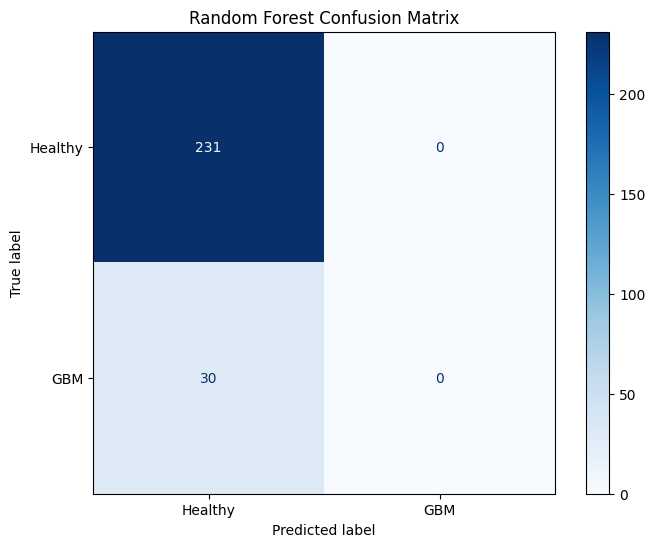

In [ ]:
# --- 5. Plot Confusion Matrix for the *Best* Model ---
# (Let's assume Random Forest is our best model)

print("\n--- Plotting Confusion Matrix for Random Forest ---")

# Labels for our matrix
display_labels = ['Healthy', 'GBM']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rand_forest,
    display_labels=display_labels,
    cmap='Blues', # Color map
    ax=ax
)
ax.set_title('Random Forest Confusion Matrix')
plt.show()

--- Training Model 1: Lasso Features (460 genes) ---
Training data shape: (1043, 460)
Model training complete.

--- Results for Lasso Feature Model ---
Accuracy: 88.51%
              precision    recall  f1-score   support

     Healthy       0.89      1.00      0.94       231
         GBM       0.00      0.00      0.00        30

    accuracy                           0.89       261
   macro avg       0.44      0.50      0.47       261
weighted avg       0.78      0.89      0.83       261


Plotting Confusion Matrix for Lasso Model:


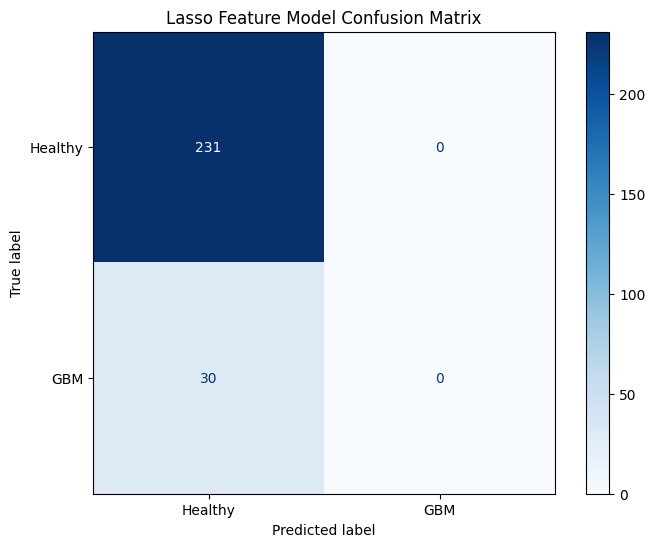

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# --- 1. Filter X data to ONLY the selected features ---
# We use the gene list from our Lasso (feature_list_A)
X_train_lasso = X_train[feature_list_A]
X_test_lasso = X_test[feature_list_A]

print(f"--- Training Model 1: Lasso Features ({len(feature_list_A)} genes) ---")
print(f"Training data shape: {X_train_lasso.shape}")

# --- 2. Define and Train the Model ---
# We use the same Random Forest model as before
rand_forest_lasso = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rand_forest_lasso.fit(X_train_lasso, y_train_ravel)
print("Model training complete.")

# --- 3. Evaluate the Model ---
y_pred_lasso = rand_forest_lasso.predict(X_test_lasso)

print("\n--- Results for Lasso Feature Model ---")
acc_lasso = accuracy_score(y_test, y_pred_lasso)
print(f"Accuracy: {acc_lasso * 100:.2f}%")

target_names = ['Healthy', 'GBM']
print(classification_report(y_test, y_pred_lasso, target_names=target_names, zero_division=0))

# --- 4. Plot Confusion Matrix ---
print("\nPlotting Confusion Matrix for Lasso Model:")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_lasso,
    display_labels=target_names,
    cmap='Blues',
    ax=ax
)
ax.set_title('Lasso Feature Model Confusion Matrix')
plt.show()

### LASSO with Under Sampling
this should overcome the "lazy model" problem caused by unbalanced dataset

--- Training Model 1: Lasso Features (460 genes) ---
Original training shape: (1043, 460)
Original label counts:
label
1    921
3    122
Name: count, dtype: int64

--- After Undersampling ---
Balanced training shape: (244, 460)
Balanced label counts:
1    122
3    122
Name: count, dtype: int64

Model training complete.

--- Results for Lasso Feature Model (Undersampled) ---
Accuracy: 60.92%
              precision    recall  f1-score   support

     Healthy       0.89      0.64      0.74       231
         GBM       0.12      0.37      0.18        30

    accuracy                           0.61       261
   macro avg       0.50      0.50      0.46       261
weighted avg       0.80      0.61      0.68       261


Plotting Confusion Matrix for Lasso Model:


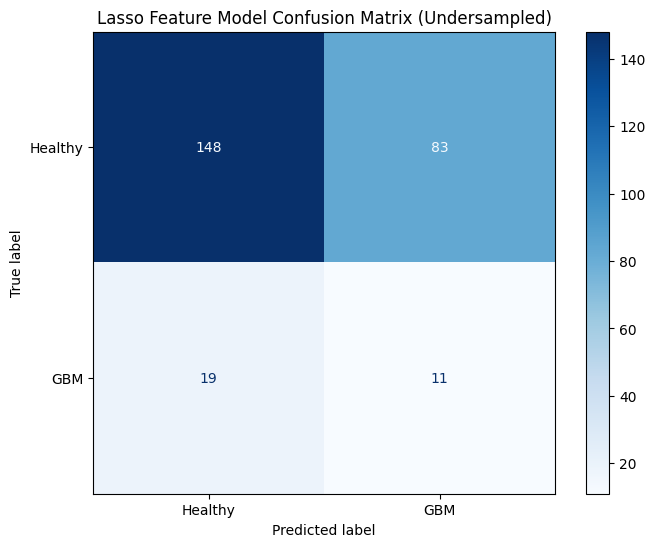

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
# We need this new import for undersampling
from imblearn.under_sampling import RandomUnderSampler 

# --- 1. Filter X data to ONLY the selected features ---
# This assumes X_train, X_test, y_train, y_test, and feature_list_A
# (with 2253 genes) are all in memory.
X_train_lasso = X_train[feature_list_A]
X_test_lasso = X_test[feature_list_A]

print(f"--- Training Model 1: Lasso Features ({len(feature_list_A)} genes) ---")
print(f"Original training shape: {X_train_lasso.shape}")
print(f"Original label counts:\n{y_train['label'].value_counts()}")

# --- 2. NEW: Manually Undersample the Training Data ---
# We create an undersampler. It will match the size of all classes
# to the size of the *smallest* class (GBM).
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced_ravel = rus.fit_resample(X_train_lasso, y_train_ravel)

print("\n--- After Undersampling ---")
print(f"Balanced training shape: {X_train_balanced.shape}")
# This will show a small, but perfectly balanced, set of labels
print(f"Balanced label counts:\n{pd.Series(y_train_balanced_ravel).value_counts()}")

# --- 3. Define and Train the Model (on BALANCED data) ---
# We can now *remove* class_weight='balanced' because the data is already balanced.
rand_forest_lasso = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# We fit on the NEW balanced data
rand_forest_lasso.fit(X_train_balanced, y_train_balanced_ravel)
print("\nModel training complete.")

# --- 4. Evaluate the Model (on the original Test Set) ---
# We still test on the *original, imbalanced* test set
y_pred_lasso = rand_forest_lasso.predict(X_test_lasso)

print("\n--- Results for Lasso Feature Model (Undersampled) ---")
acc_lasso = accuracy_score(y_test, y_pred_lasso)
print(f"Accuracy: {acc_lasso * 100:.2f}%")

target_names = ['Healthy', 'GBM']
print(classification_report(y_test, y_pred_lasso, target_names=target_names))

# --- 5. Plot Confusion Matrix ---
print("\nPlotting Confusion Matrix for Lasso Model:")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_lasso,
    display_labels=target_names,
    cmap='Blues',
    ax=ax
)
ax.set_title('Lasso Feature Model Confusion Matrix (Undersampled)')
plt.show()


--- Training Model 2: RFE Features (250 genes) ---
Original training shape: (1043, 250)

--- After Undersampling ---
Balanced training shape: (244, 250)
Balanced label counts:
1    122
3    122
Name: count, dtype: int64

Model training complete.

--- Results for RFE Feature Model (Undersampled) ---
Accuracy: 53.26%
              precision    recall  f1-score   support

     Healthy       0.85      0.58      0.69       231
         GBM       0.06      0.20      0.09        30

    accuracy                           0.53       261
   macro avg       0.45      0.39      0.39       261
weighted avg       0.76      0.53      0.62       261


Plotting Confusion Matrix for RFE Model:


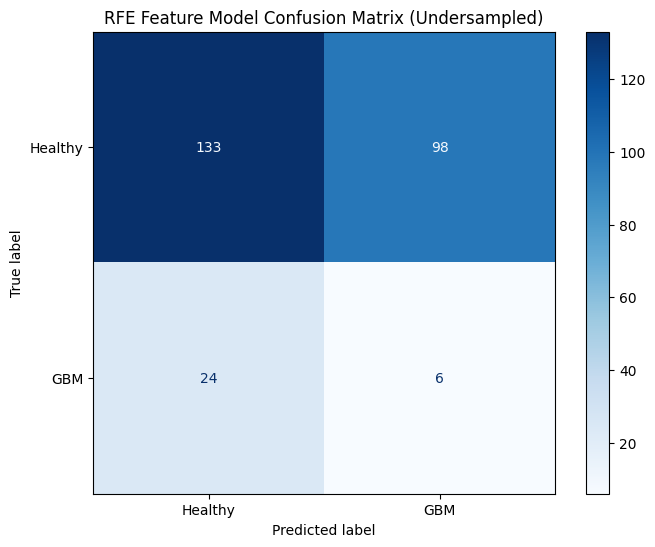

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler 

# --- 1. Filter X data to ONLY the selected features ---
# We use the gene list from our RFE (feature_list_B)
X_train_rfe = X_train[feature_list_B]
X_test_rfe = X_test[feature_list_B]

print(f"\n--- Training Model 2: RFE Features ({len(feature_list_B)} genes) ---")
print(f"Original training shape: {X_train_rfe.shape}")

# --- 2. Manually Undersample the Training Data ---
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced_ravel = rus.fit_resample(X_train_rfe, y_train_ravel)

print("\n--- After Undersampling ---")
print(f"Balanced training shape: {X_train_balanced.shape}")
print(f"Balanced label counts:\n{pd.Series(y_train_balanced_ravel).value_counts()}")

# --- 3. Define and Train the Model (on BALANCED data) ---
rand_forest_rfe = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# We fit on the NEW balanced data
rand_forest_rfe.fit(X_train_balanced, y_train_balanced_ravel)
print("\nModel training complete.")

# --- 4. Evaluate the Model (on the original Test Set) ---
y_pred_rfe = rand_forest_rfe.predict(X_test_rfe)

print("\n--- Results for RFE Feature Model (Undersampled) ---")
acc_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy: {acc_rfe * 100:.2f}%")

target_names = ['Healthy', 'GBM']
print(classification_report(y_test, y_pred_rfe, target_names=target_names))

# --- 5. Plot Confusion Matrix ---
print("\nPlotting Confusion Matrix for RFE Model:")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rfe,
    display_labels=target_names,
    cmap='Blues',
    ax=ax
)
ax.set_title('RFE Feature Model Confusion Matrix (Undersampled)')
plt.show()

## Literature Driven feature selection

In [ ]:
X_train

,ENSG00000242268,ENSG00000259041,ENSG00000270112,ENSG00000167578,ENSG00000278814,ENSG00000078237,ENSG00000269416,ENSG00000263642,ENSG00000146083,ENSG00000158486,...,ENSG00000009694,ENSG00000238244,ENSG00000216352,ENSG00000123685,ENSG00000267117,ENSG00000273233,ENSG00000105063,ENSG00000231119,ENSG00000280861,ENSG00000181518
sample_id,,,,,,,,,,,,,,,,,,,,,
GTEX-RVPU-0011-R4A-SM-2TF6X,-9.9658,-9.9658,-5.5735,4.2684,-9.9658,-2.1779,-5.0116,-9.9658,0.5370,-6.5064,...,-2.1779,-9.9658,-9.9658,0.6050,-9.9658,-1.7809,2.2723,-2.1779,-9.9658,-9.9658
GTEX-132Q8-0011-R10b-SM-5DUWZ,-3.3076,-9.9658,0.8164,6.2713,-9.9658,1.8957,-2.4659,-9.9658,4.6083,-4.6082,...,0.2154,-9.9658,-9.9658,2.4753,-2.2447,0.6332,5.2438,-1.9379,-9.9658,-9.9658
GTEX-QVUS-0011-R10A-SM-3GIK3,-1.9942,-9.9658,1.4808,6.0155,-9.9658,1.9564,-5.5735,-9.9658,4.3406,-5.5735,...,-0.1828,-1.0262,-9.9658,2.4279,-9.9658,-0.3383,4.6736,-3.4580,-9.9658,-9.9658
TCGA-32-2634-01,0.7321,-9.9658,-1.1488,5.3625,-9.9658,3.5694,2.0360,-9.9658,4.7480,-1.5951,...,0.4657,-9.9658,-9.9658,3.2796,-9.9658,-3.3076,4.9910,-1.5522,-9.9658,-9.9658
GTEX-WZTO-0011-R8A-SM-4E3II,0.0990,-9.9658,-1.2481,6.6421,-9.9658,1.5854,-0.3201,-9.9658,4.5850,-1.6394,...,1.3679,-9.9658,-9.9658,0.5763,-9.9658,-1.9379,4.6645,-1.2142,-9.9658,-5.0116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-13NYB-0011-R10a-SM-5KM43,-3.8160,-9.9658,0.7321,5.9923,-9.9658,1.6558,-3.6259,-9.9658,4.3249,-9.9658,...,-0.3022,-9.9658,-9.9658,3.0927,-1.8314,-0.4325,4.7635,-2.9324,-9.9658,-5.0116
GTEX-147GR-0011-R2b-SM-5S2RQ,-3.4580,-9.9658,-1.7809,6.0168,-9.9658,0.8568,-1.6850,-9.9658,3.6905,-6.5064,...,0.3573,-9.9658,-9.9658,1.7702,-0.8339,-1.3183,3.6961,-1.7809,-9.9658,-9.9658
GTEX-145LS-0011-R7a-SM-5PNWM,-9.9658,-9.9658,0.1776,5.7913,-9.9658,1.1577,-3.4580,-9.9658,4.2495,-3.0469,...,-0.3022,-9.9658,-9.9658,3.3061,-1.1488,0.9419,5.5805,-2.0529,-9.9658,-9.9658


Loading gene map from: data/processed/gene_map.csv
Gene map loaded successfully.

--- Training Model 3: Literature-Driven Features ---
Total genes found: 12
Genes found: ['ENSG00000138413', 'ENSG00000146648', 'ENSG00000164362', 'ENSG00000085224', 'ENSG00000171862', 'ENSG00000170430', 'ENSG00000141510', 'ENSG00000134853', 'ENSG00000079432', 'ENSG00000162613', 'ENSG00000147889', 'ENSG00000121879']
Balanced training shape: (244, 12)
Model training complete.

--- Results for Literature-Driven Model (Undersampled) ---
Accuracy: 51.34%
              precision    recall  f1-score   support

     Healthy       0.88      0.52      0.66       231
         GBM       0.11      0.43      0.17        30

    accuracy                           0.51       261
   macro avg       0.49      0.48      0.41       261
weighted avg       0.79      0.51      0.60       261


Plotting Confusion Matrix for Literature-Driven Model:


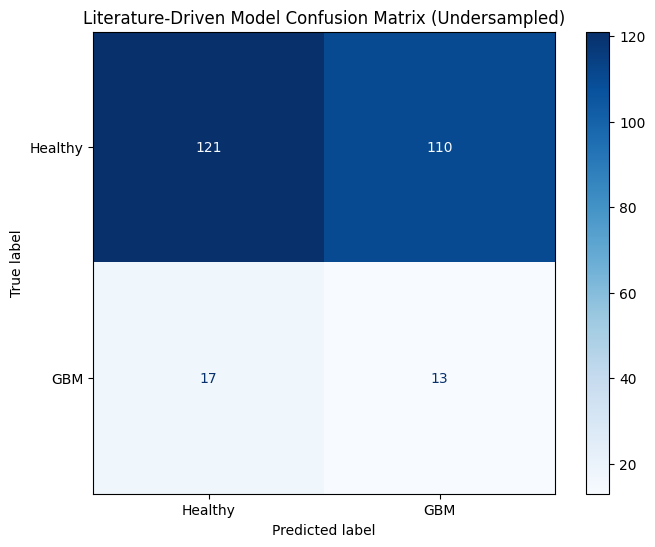

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler 
import numpy as np

# --- 1. Load the Pre-built Gene Map ---
map_filepath = "data/processed/gene_map.csv"
print(f"Loading gene map from: {map_filepath}")

try:
    map_df = pd.read_csv(map_filepath)
    gene_symbol_map = pd.Series(map_df.gene_id_clean.values, index=map_df.gene_name).to_dict()
    gene_symbol_map_reverse = {v: k for k, v in gene_symbol_map.items()}
    print("Gene map loaded successfully.")
except FileNotFoundError:
    print(f"FATAL ERROR: '{map_filepath}' not found.")
    print("Please run the 'create_gene_map.py' script first.")
    raise

# --- 2. Define the Literature-Driven Gene List ---
knowledge_driven_genes = [
    'IDH1', 'EGFR', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'TP53', 
    'PDGFRA', 'CIC', 'FUBP1', 'CDKN2A', 'PIK3CA'
]

# --- 3. Create feature_list_C ---
feature_list_C = []
genes_not_found = []

for gene_symbol in knowledge_driven_genes:
    try:
        # 1. Find the Ensembl ID from the map (dictionary)
        ensembl_id = gene_symbol_map[gene_symbol]
        
        # 2. Check if that Ensembl ID exists in our X_train columns
        if ensembl_id in X_train.columns:
            feature_list_C.append(ensembl_id)
        else:
            genes_not_found.append(f"{gene_symbol} (ID: {ensembl_id}, not in final data)")
            
    except KeyError:
        genes_not_found.append(f"{gene_symbol} (Symbol not in map)")

print(f"\n--- Training Model 3: Literature-Driven Features ---")
print(f"Total genes found: {len(feature_list_C)}")
print(f"Genes found: {feature_list_C}")
if genes_not_found:
    print(f"Warning: Could not find these genes: {genes_not_found}")

# --- 4. Filter X data to ONLY the selected features ---
X_train_lit = X_train[feature_list_C]
X_test_lit = X_test[feature_list_C]

# --- 5. Manually Undersample the Training Data ---
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced_ravel = rus.fit_resample(X_train_lit, y_train_ravel)
print(f"Balanced training shape: {X_train_balanced.shape}")

# --- 6. Define and Train the Model (on BALANCED data) ---
rand_forest_lit = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rand_forest_lit.fit(X_train_balanced, y_train_balanced_ravel)
print("Model training complete.")

# --- 7. Evaluate the Model (on the original Test Set) ---
y_pred_lit = rand_forest_lit.predict(X_test_lit)

print("\n--- Results for Literature-Driven Model (Undersampled) ---")
acc_lit = accuracy_score(y_test, y_pred_lit)
print(f"Accuracy: {acc_lit * 100:.2f}%")

target_names = ['Healthy', 'GBM']
print(classification_report(y_test, y_pred_lit, target_names=target_names))

# --- 8. Plot Confusion Matrix ---
print("\nPlotting Confusion Matrix for Literature-Driven Model:")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_lit,
    display_labels=target_names,
    cmap='Blues',
    ax=ax
)
ax.set_title('Literature-Driven Model Confusion Matrix (Undersampled)')
plt.show()


--- Training Final Model: Knowledge-Driven + class_weight='balanced' ---
Training on 12 expert-selected genes.
Training data shape: (1043, 60498)
Original label counts:
label
1    921
3    122
Name: count, dtype: int64

Model training complete.

--- Results for Final Model ---
Accuracy: 88.12%
              precision    recall  f1-score   support

     Healthy       0.88      1.00      0.94       231
         GBM       0.00      0.00      0.00        30

    accuracy                           0.88       261
   macro avg       0.44      0.50      0.47       261
weighted avg       0.78      0.88      0.83       261


Plotting Confusion Matrix for Final Model:


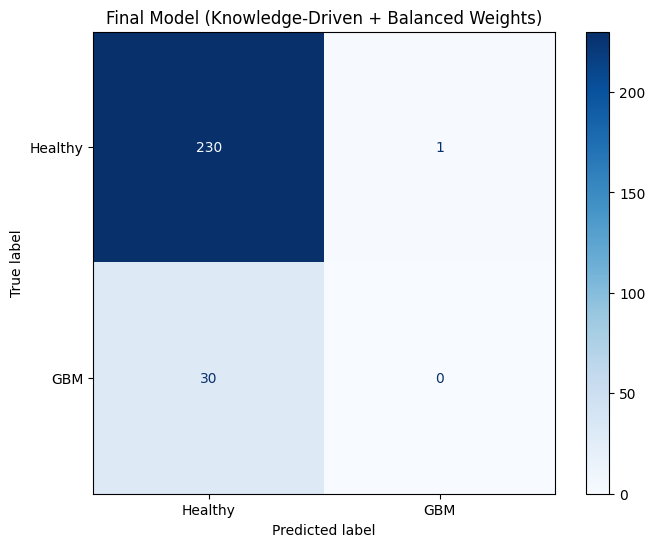

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

print("\n--- Training Final Model: Knowledge-Driven + class_weight='balanced' ---")
print(f"Training on {len(feature_list_C)} expert-selected genes.")
print(f"Training data shape: {X_train.shape}")
print(f"Original label counts:\n{y_train['label'].value_counts()}")

# --- 1. Filter X data to ONLY the selected features ---
X_train_lit = X_train[feature_list_C]
X_test_lit = X_test[feature_list_C]

# --- 2. Define and Train the Model (NO SAMPLING) ---
# We use class_weight='balanced' on the *original, imbalanced* data
rand_forest_final = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # <-- This is the key
    random_state=42,
    n_jobs=-1
)

# Fit on the original, imbalanced (but feature-selected) training data
rand_forest_final.fit(X_train_lit, y_train_ravel)
print("\nModel training complete.")

# --- 3. Evaluate the Model ---
y_pred_final = rand_forest_final.predict(X_test_lit)

print("\n--- Results for Final Model ---")
acc_final = accuracy_score(y_test, y_pred_final)
print(f"Accuracy: {acc_final * 100:.2f}%")

target_names = ['Healthy', 'GBM']
print(classification_report(y_test, y_pred_final, target_names=target_names))

# --- 4. Plot Confusion Matrix ---
print("\nPlotting Confusion Matrix for Final Model:")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_final,
    display_labels=target_names,
    cmap='Blues',
    ax=ax
)
ax.set_title('Final Model (Knowledge-Driven + Balanced Weights)')
plt.show()

## Advanced Model Analysis

### SHAP Analysis

In [ ]:
import shap
import numpy as np

print("Generating SHAP values for knowledge-driven model")

explainer = shap.TreeExplainer(rand_forest_lit)
shap_values_raw = explainer.shap_values(X_test_lit)

print(f"Raw SHAP values type: {type(shap_values_raw)}")
if isinstance(shap_values_raw, list):
    print(f"List length: {len(shap_values_raw)}")
    for i, sv in enumerate(shap_values_raw):
        print(f"  Class {i} shape: {sv.shape}")
    shap_values_class = shap_values_raw[1]
elif isinstance(shap_values_raw, np.ndarray):
    print(f"Array shape: {shap_values_raw.shape}")
    if len(shap_values_raw.shape) == 3:
        shap_values_class = shap_values_raw[:, :, 1]
    else:
        shap_values_class = shap_values_raw
else:
    shap_values_class = shap_values_raw

print(f"Final SHAP values shape: {shap_values_class.shape}")
print(f"Expected value: {explainer.expected_value}")

Generating SHAP values for knowledge-driven model
Raw SHAP values type: <class 'numpy.ndarray'>
Array shape: (261, 12, 2)
Final SHAP values shape: (261, 12)
Expected value: [0.4967623 0.5032377]


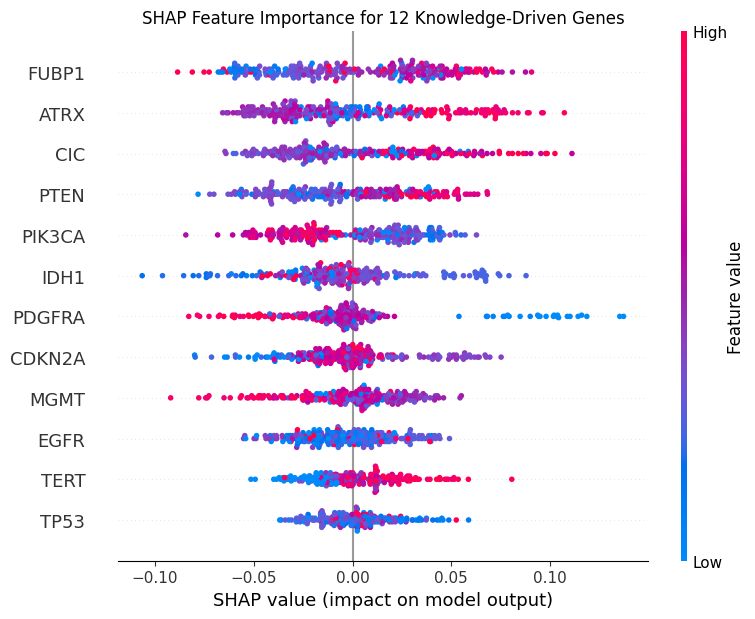

In [ ]:
gene_names_display = [gene_symbol_map_reverse.get(col, col) for col in X_test_lit.columns]

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_class, X_test_lit, feature_names=gene_names_display, show=False)
plt.title("SHAP Feature Importance for 12 Knowledge-Driven Genes")
plt.tight_layout()
plt.show()


Misclassified sample analysis:
True label: 3, Predicted: 1


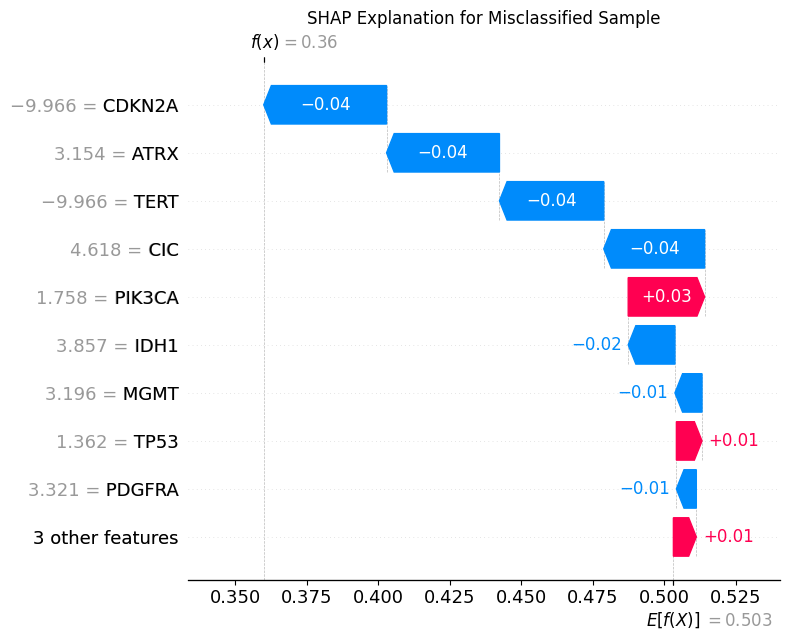

In [ ]:
misclassified_indices = np.where(y_pred_lit != y_test.values.ravel())[0]

if len(misclassified_indices) > 0:
    sample_idx = misclassified_indices[0]
    
    true_label = y_test.values.ravel()[sample_idx]
    pred_label = y_pred_lit[sample_idx]
    
    print(f"\nMisclassified sample analysis:")
    print(f"True label: {true_label}, Predicted: {pred_label}")
    
    base_val = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value
    
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_class[sample_idx],
            base_values=base_val,
            data=X_test_lit.iloc[sample_idx].values,
            feature_names=gene_names_display
        ),
        show=False
    )
    plt.title(f"SHAP Explanation for Misclassified Sample")
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified samples found")

### Learning Curves

Computing learning curves for knowledge-driven model
NOTE: Learning curve uses ORIGINAL training data with undersampling in pipeline
Original training set: 1043 samples
Class distribution: {1: 921, 3: 122}



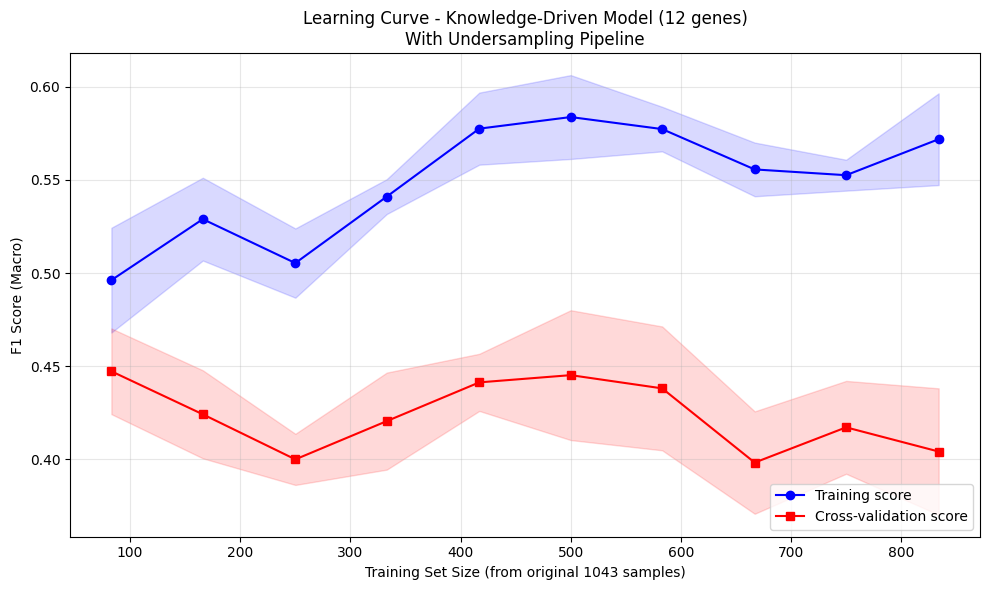

Final training score: 0.572
Final validation score: 0.404
Gap: 0.168


In [ ]:
from sklearn.model_selection import learning_curve
from imblearn.pipeline import Pipeline as ImbPipeline

print("Computing learning curves for knowledge-driven model")
print("NOTE: Learning curve uses ORIGINAL training data with undersampling in pipeline")
print(f"Original training set: {X_train[feature_list_C].shape[0]} samples")
print(f"Class distribution: {pd.Series(y_train_ravel).value_counts().to_dict()}\n")

# Create pipeline with undersampling + model
# This ensures undersampling is applied at each training size
pipeline = ImbPipeline([
    ('sampler', RandomUnderSampler(random_state=42)),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# Use ORIGINAL training data (X_train, y_train_ravel)
# Learning curve will apply undersampling internally for each fold
train_sizes, train_scores, val_scores = learning_curve(
    pipeline,
    X_train[feature_list_C],  # Use original training data with selected features
    y_train_ravel,            # Use original training labels
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, val_mean, label='Cross-validation score', color='red', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='red')
plt.xlabel('Training Set Size (from original 1043 samples)')
plt.ylabel('F1 Score (Macro)')
plt.title('Learning Curve - Knowledge-Driven Model (12 genes)\nWith Undersampling Pipeline')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training score: {train_mean[-1]:.3f}")
print(f"Final validation score: {val_mean[-1]:.3f}")
print(f"Gap: {train_mean[-1] - val_mean[-1]:.3f}")

### Calibration Curves

Computing calibration curves for all three models



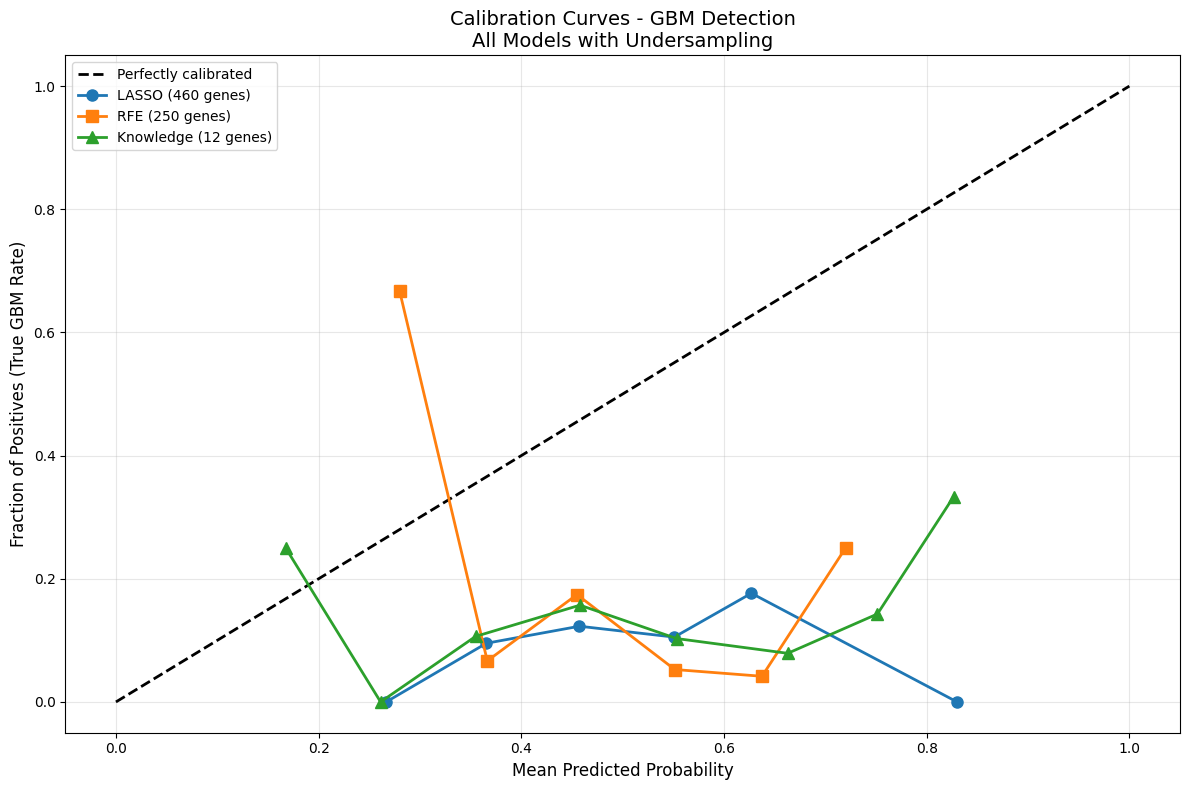

In [ ]:
from sklearn.calibration import calibration_curve

print("Computing calibration curves for all three models\n")

# Get predicted probabilities for GBM class (class index 1 in binary after conversion)
y_test_binary = (y_test.values.ravel() == 3).astype(int)

# LASSO model probabilities
y_proba_lasso = rand_forest_lasso.predict_proba(X_test[feature_list_A])[:, 1]
prob_true_lasso, prob_pred_lasso = calibration_curve(
    y_test_binary, y_proba_lasso, n_bins=10, strategy='uniform'
)

# RFE model probabilities
y_proba_rfe = rand_forest_rfe.predict_proba(X_test[feature_list_B])[:, 1]
prob_true_rfe, prob_pred_rfe = calibration_curve(
    y_test_binary, y_proba_rfe, n_bins=10, strategy='uniform'
)

# Knowledge-driven model probabilities
y_proba_lit = rand_forest_lit.predict_proba(X_test[feature_list_C])[:, 1]
prob_true_lit, prob_pred_lit = calibration_curve(
    y_test_binary, y_proba_lit, n_bins=10, strategy='uniform'
)

# Plot all three calibration curves
plt.figure(figsize=(12, 8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Perfectly calibrated')
plt.plot(prob_pred_lasso, prob_true_lasso, marker='o', linewidth=2, 
         label='LASSO (460 genes)', markersize=8)
plt.plot(prob_pred_rfe, prob_true_rfe, marker='s', linewidth=2,
         label='RFE (250 genes)', markersize=8)
plt.plot(prob_pred_lit, prob_true_lit, marker='^', linewidth=2,
         label='Knowledge (12 genes)', markersize=8)

plt.xlabel('Mean Predicted Probability', fontsize=12)
plt.ylabel('Fraction of Positives (True GBM Rate)', fontsize=12)
plt.title('Calibration Curves - GBM Detection\nAll Models with Undersampling', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### ROC Curves and AUC

Computing ROC curves for all three models
NOTE: All models trained with undersampling, tested on imbalanced data



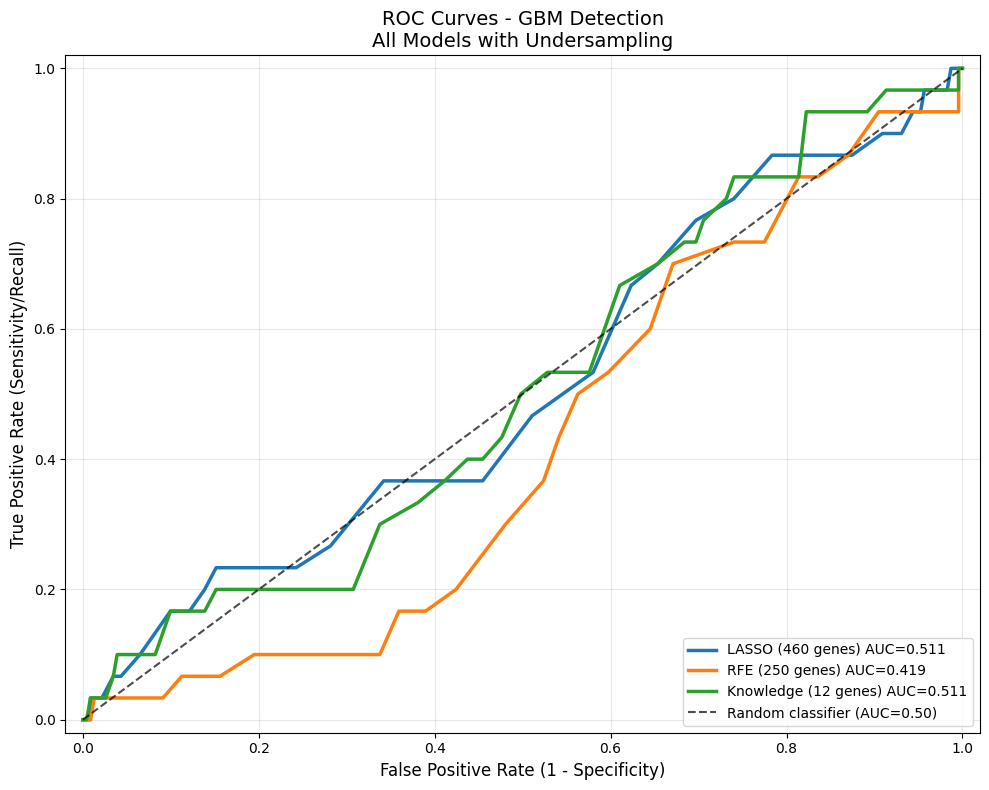

In [ ]:
from sklearn.metrics import roc_curve, auc

print("Computing ROC curves for all three models")
print("NOTE: All models trained with undersampling, tested on imbalanced data\n")

y_test_binary = (y_test.values.ravel() == 3).astype(int)

# Get predicted probabilities (consistent feature selection)
y_proba_lasso = rand_forest_lasso.predict_proba(X_test[feature_list_A])[:, 1]
y_proba_rfe = rand_forest_rfe.predict_proba(X_test[feature_list_B])[:, 1]
y_proba_lit = rand_forest_lit.predict_proba(X_test[feature_list_C])[:, 1]

# Calculate ROC curves
fpr_lasso, tpr_lasso, _ = roc_curve(y_test_binary, y_proba_lasso)
fpr_rfe, tpr_rfe, _ = roc_curve(y_test_binary, y_proba_rfe)
fpr_lit, tpr_lit, _ = roc_curve(y_test_binary, y_proba_lit)

# Calculate AUC scores
auc_lasso = auc(fpr_lasso, tpr_lasso)
auc_rfe = auc(fpr_rfe, tpr_rfe)
auc_lit = auc(fpr_lit, tpr_lit)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lasso, tpr_lasso, label=f'LASSO ({len(feature_list_A)} genes) AUC={auc_lasso:.3f}', linewidth=2.5)
plt.plot(fpr_rfe, tpr_rfe, label=f'RFE ({len(feature_list_B)} genes) AUC={auc_rfe:.3f}', linewidth=2.5)
plt.plot(fpr_lit, tpr_lit, label=f'Knowledge ({len(feature_list_C)} genes) AUC={auc_lit:.3f}', linewidth=2.5)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC=0.50)', linewidth=1.5, alpha=0.7)

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.title('ROC Curves - GBM Detection\nAll Models with Undersampling', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.tight_layout()
plt.show()

### Precision-Recall Curves

Computing Precision-Recall curves for all three models
NOTE: PR curves are more informative than ROC for imbalanced datasets



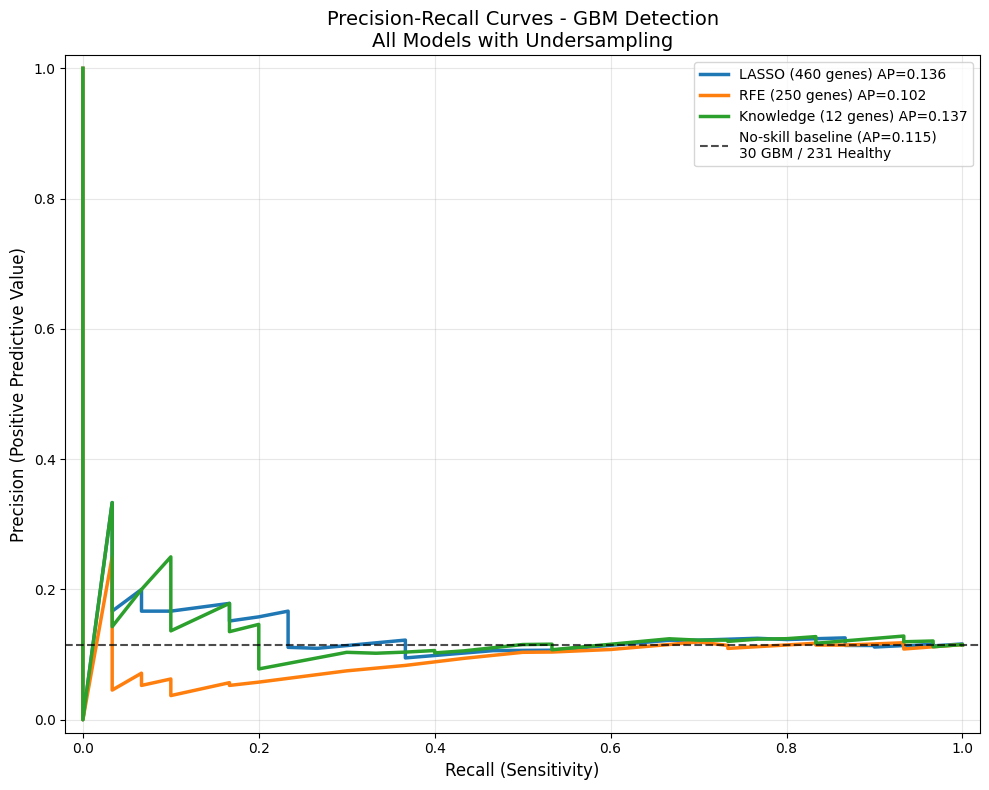

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

print("Computing Precision-Recall curves for all three models")
print("NOTE: PR curves are more informative than ROC for imbalanced datasets\n")

# Calculate PR curves (y_test_binary and probabilities already defined above)
precision_lasso, recall_lasso, _ = precision_recall_curve(y_test_binary, y_proba_lasso)
precision_rfe, recall_rfe, _ = precision_recall_curve(y_test_binary, y_proba_rfe)
precision_lit, recall_lit, _ = precision_recall_curve(y_test_binary, y_proba_lit)

# Calculate Average Precision scores
ap_lasso = average_precision_score(y_test_binary, y_proba_lasso)
ap_rfe = average_precision_score(y_test_binary, y_proba_rfe)
ap_lit = average_precision_score(y_test_binary, y_proba_lit)

# Baseline = class prevalence in test set
baseline = y_test_binary.sum() / len(y_test_binary)
num_gbm = y_test_binary.sum()
num_healthy = len(y_test_binary) - num_gbm

plt.figure(figsize=(10, 8))
plt.plot(recall_lasso, precision_lasso, label=f'LASSO ({len(feature_list_A)} genes) AP={ap_lasso:.3f}', linewidth=2.5)
plt.plot(recall_rfe, precision_rfe, label=f'RFE ({len(feature_list_B)} genes) AP={ap_rfe:.3f}', linewidth=2.5)
plt.plot(recall_lit, precision_lit, label=f'Knowledge ({len(feature_list_C)} genes) AP={ap_lit:.3f}', linewidth=2.5)
plt.axhline(y=baseline, color='k', linestyle='--', 
            label=f'No-skill baseline (AP={baseline:.3f})\n{num_gbm} GBM / {num_healthy} Healthy', 
            linewidth=1.5, alpha=0.7)

plt.xlabel('Recall (Sensitivity)', fontsize=12)
plt.ylabel('Precision (Positive Predictive Value)', fontsize=12)
plt.title('Precision-Recall Curves - GBM Detection\nAll Models with Undersampling', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.grid(alpha=0.3)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.tight_layout()
plt.show()

### Stratified K-Fold Validation
We evaluate each feature subset with 5-fold Stratified CV using an undersampled RandomForest pipeline to quantify variance in macro F1 and GBM recall.

,Feature Set,Macro F1 (mean),Macro F1 (std),GBM Recall (mean),GBM Recall (std)
0,LASSO (323 genes),0.511,0.031,0.554,0.057
1,RFE (250 genes),0.501,0.010,0.572,0.072
2,Knowledge (12 genes),0.420,0.022,0.520,0.053


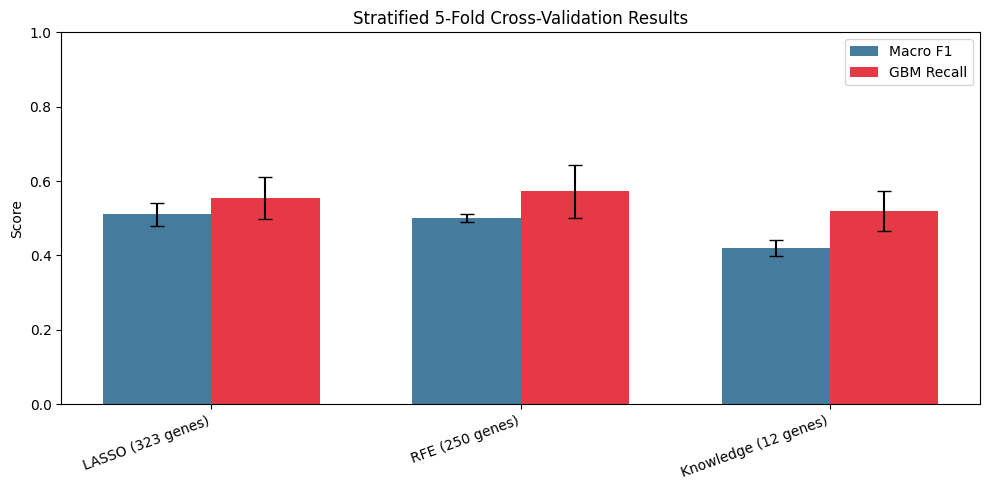

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, f1_score, recall_score
from imblearn.pipeline import Pipeline

# Custom scorer to avoid pos_label issue with macro F1
def macro_f1_scorer(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro', zero_division=0)

def gbm_recall_scorer(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=3, zero_division=0)

feature_sets = [
    ("LASSO (323 genes)", feature_list_A),
    ("RFE (250 genes)", feature_list_B),
    ("Knowledge (12 genes)", feature_list_C)
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_rows = []

for name, feature_list in feature_sets:
    X_subset = X[feature_list]
    pipeline = Pipeline([
        ('sampler', RandomUnderSampler(random_state=42)),
        ('model', RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        ))
    ])
    scores = cross_validate(
        pipeline,
        X_subset,
        y.values.ravel(),
        cv=cv,
        scoring={
            'macro_f1': make_scorer(macro_f1_scorer),
            'gbm_recall': make_scorer(gbm_recall_scorer)
        },
        n_jobs=-1,
        return_train_score=False
    )
    cv_rows.append({
        'Feature Set': name,
        'Macro F1 (mean)': float(np.mean(scores['test_macro_f1'])),
        'Macro F1 (std)': float(np.std(scores['test_macro_f1'])),
        'GBM Recall (mean)': float(np.mean(scores['test_gbm_recall'])),
        'GBM Recall (std)': float(np.std(scores['test_gbm_recall']))
    })

cv_results_df = pd.DataFrame(cv_rows)
display(cv_results_df.round(3))

plt.figure(figsize=(10, 5))
x = np.arange(len(cv_results_df))
width = 0.35

plt.bar(x - width/2, cv_results_df['Macro F1 (mean)'], width, 
        label='Macro F1', color='#457B9D', yerr=cv_results_df['Macro F1 (std)'], capsize=5)
plt.bar(x + width/2, cv_results_df['GBM Recall (mean)'], width,
        label='GBM Recall', color='#E63946', yerr=cv_results_df['GBM Recall (std)'], capsize=5)

plt.ylabel('Score')
plt.title('Stratified 5-Fold Cross-Validation Results')
plt.xticks(x, cv_results_df['Feature Set'], rotation=20, ha='right')
plt.legend()
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()
